In [1]:
def l(*t):
    print(t)
def ac(model,y_valid,X_valid ):
    print(accuracy_score(y_valid.tolist(),model.predict(X_valid)))
def dist(x1,y1,x2,y2):
    return np.linalg.norm(x1-x2) + np.linalg.norm(y2-y1)

'17 раз до 9 27сек'
'100 3.3 3мин'
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
from catboost import CatBoostRegressor,Pool,CatBoostClassifier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
vendor_id            10000 non-null object
pickup_datetime      10000 non-null datetime64[ns]
pickup_longitude     10000 non-null float64
pickup_latitude      10000 non-null float64
dropoff_longitude    10000 non-null float64
dropoff_latitude     10000 non-null float64
rate_code            8973 non-null float64
passenger_count      10000 non-null int64
trip_distance        10000 non-null float64
fare_amount          10000 non-null float64
tolls_amount         10000 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 859.5+ KB


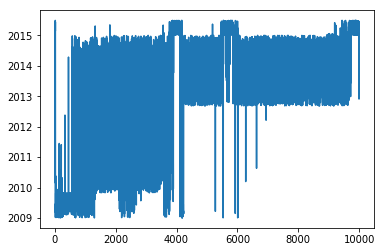

In [2]:
import NumpyAlg as fe
data=fe.create_features(fe.readCsv(nrows=1000000))
#data=fe.data2

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822363 entries, 11 to 999910
Data columns (total 11 columns):
vendor_id            822363 non-null object
pickup_longitude     822363 non-null object
pickup_latitude      822363 non-null object
dropoff_longitude    822363 non-null object
dropoff_latitude     822363 non-null object
rate_code            822363 non-null float64
passenger_count      822363 non-null int64
trip_distance        822363 non-null float64
fare                 822363 non-null float64
p_hour               822363 non-null int64
p_dayofweek          822363 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 75.3+ MB


In [4]:
data.describe()

,rate_code,passenger_count,trip_distance,fare,p_hour,p_dayofweek
count,822363.000000,822363.000000,822363.000000,822363.000000,822363.000000,822363.000000
mean,1.028171,1.683075,2.880641,11.519334,13.510644,3.040125
std,0.240765,1.316161,3.354371,9.699411,6.526166,1.951416
min,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,1.050000,6.100000,9.000000,1.000000
50%,1.000000,1.000000,1.800000,8.500000,14.000000,3.000000
75%,1.000000,2.000000,3.200000,12.900000,19.000000,5.000000
max,33.000000,6.000000,99.800000,262.000000,23.000000,6.000000


In [5]:
p={
#    custom_loss=['Accuracy'],
    'iterations':100,
#    'learning_rate':0.1,
    'eval_metric':'Accuracy',
    'random_seed':42,
#    'logging_level':'Silent',
#    'logging_level':'Debug',

#    'use_best_model':False,
    'save_snapshot':False,

}
m=CatBoostRegressor(**p)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 822363 entries, 11 to 999910
Data columns (total 11 columns):
vendor_id            822363 non-null object
pickup_longitude     822363 non-null object
pickup_latitude      822363 non-null object
dropoff_longitude    822363 non-null object
dropoff_latitude     822363 non-null object
rate_code            822363 non-null float64
passenger_count      822363 non-null int64
trip_distance        822363 non-null float64
fare                 822363 non-null float64
p_hour               822363 non-null int64
p_dayofweek          822363 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 75.3+ MB


In [6]:
cat_f_col_ind=np.where(data.dtypes!=np.float)[0]
cat_f_col_ind=[0,1,2,3,4,8,9] # НЕ забудь что 'fare' ты дропаешь!!!

data.dropoff_longitude=data.dropoff_longitude.apply(np.str)
data.dropoff_latitude=data.dropoff_latitude.apply(np.str)
data.pickup_latitude=data.pickup_latitude.apply(np.str)
data.pickup_longitude=data.pickup_longitude.apply(np.str)
data.p_dayofweek=data.p_dayofweek.apply(np.str)
data.p_hour=data.p_hour.apply(np.str)
data.passenger_count=data.passenger_count.apply(np.float)

X=data
X=X.drop('fare',axis=1)
y=data['fare']

from sklearn.model_selection import train_test_split
X_tr, X_valid, y_tr, y_valid=train_test_split(X,y,train_size=0.6)

tr_pool=Pool(X_tr,y_tr,cat_features=cat_f_col_ind)
valid_pool=Pool(X_valid,y_valid,cat_features=cat_f_col_ind)



C:\Users\ayaz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
%matplotlib inline
m.fit(tr_pool)

0:	learn: 0.9999959	total: 1.15s	remaining: 1m 54s
1:	learn: 0.9999959	total: 1.97s	remaining: 1m 36s
2:	learn: 0.9999959	total: 2.71s	remaining: 1m 27s
3:	learn: 0.9999959	total: 3.84s	remaining: 1m 32s
4:	learn: 0.9999959	total: 4.99s	remaining: 1m 34s
5:	learn: 0.9999959	total: 6.04s	remaining: 1m 34s
6:	learn: 0.9999959	total: 6.83s	remaining: 1m 30s
7:	learn: 0.9999959	total: 7.61s	remaining: 1m 27s
8:	learn: 0.9999959	total: 8.4s	remaining: 1m 24s
9:	learn: 0.9999959	total: 9.24s	remaining: 1m 23s
10:	learn: 0.9999959	total: 10.4s	remaining: 1m 23s
11:	learn: 0.9999959	total: 11.6s	remaining: 1m 24s
12:	learn: 0.9999959	total: 12.6s	remaining: 1m 24s
13:	learn: 0.9999959	total: 13.6s	remaining: 1m 23s
14:	learn: 0.9999959	total: 14.8s	remaining: 1m 23s
15:	learn: 0.9999959	total: 15.9s	remaining: 1m 23s
16:	learn: 0.9999959	total: 17s	remaining: 1m 23s
17:	learn: 0.9999959	total: 18.2s	remaining: 1m 22s
18:	learn: 0.9999959	total: 19s	remaining: 1m 21s
19:	learn: 0.9999959	total:

In [8]:
tr_pool.get_cat_feature_hash_to_string()


{-3.032316143089037e+23: b'40.28',
 5.954062642739067e+33: b'-72.85',
 -1.795870652090197e-16: b'-73.61',
 6.255754415622099e-27: b'40.86',
 -1.5324417530020214e-27: b'9',
 -1.5169563736838179e+35: b'40.38',
 3.766831753182487e-07: b'-73.64',
 -5.217265703033049e-23: b'-74.18',
 2.1206628575583253e-14: b'43.92',
 -6.579069675702171e-17: b'39.87',
 -49347.19140625: b'40.42',
 4411341582368768.0: b'-70.27',
 1.078493868699984e-23: b'-72.3',
 1.1546621164668499e-24: b'-65.34',
 4.878357035358651e-21: b'-73.54',
 2.3079432269920396e-30: b'-73.45',
 -1.5704358153907554e-21: b'40.6',
 -0.05512981489300728: b'-72.82',
 3.5801413228139387e+25: b'40.39',
 1.468826770684728e+23: b'-74.39',
 -895.77685546875: b'-73.88',
 4.0347395759093e-29: b'41.37',
 -1.1840281487080717e+21: b'-64.43',
 9.05812490986646e-12: b'-73.23',
 1.544982630719005e-08: b'-72.4',
 -1.142353482919134e-07: b'40.95',
 4.292023748439877e-35: b'40.1',
 -2.7910209269465907e+32: b'-73.2',
 -81440238731264.0: b'-73.32',
 -1.19626

In [9]:
pred=m.predict(X_valid)

#m.score(pred,y_valid)

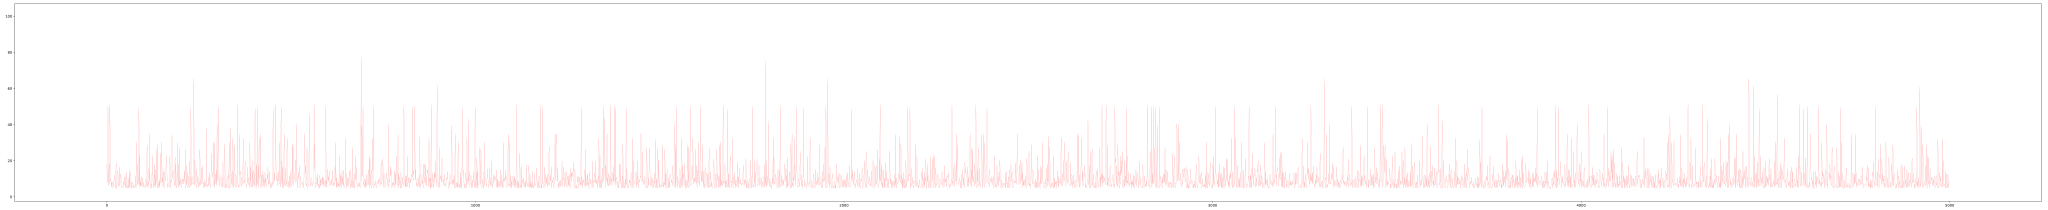

In [26]:
plt.rcParams['figure.figsize']=(100,10)
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

plt.plot(y_valid.tolist()[:5000],linewidth=0.1)
plt.plot(pred[:5000],'red',linewidth=0.2)
m.get_feature_importance()

m.save_model('p__1')

In [22]:
y_train.tolist()



[4.5,
 17.0,
 15.5,
 5.0,
 23.3,
 4.5,
 6.1,
 8.0,
 14.5,
 12.5,
 6.5,
 5.7,
 33.699999999999996,
 15.0,
 9.0,
 12.0,
 3.5,
 7.0,
 5.7,
 9.0,
 4.0,
 4.9,
 8.5,
 8.0,
 7.0,
 21.0,
 7.0,
 15.5,
 4.5,
 7.5,
 8.5,
 8.5,
 8.0,
 10.5,
 41.3,
 4.1,
 6.5,
 3.3,
 12.0,
 8.1,
 16.0,
 5.3,
 6.5,
 5.0,
 5.7,
 9.3,
 8.9,
 39.0,
 5.0,
 6.1,
 4.5,
 4.1,
 17.5,
 9.5,
 12.5,
 8.0,
 7.7,
 9.7,
 11.0,
 13.5,
 12.5,
 6.1,
 3.3,
 13.0,
 7.7,
 6.5,
 8.5,
 21.0,
 8.0,
 6.5,
 4.9,
 8.5,
 5.3,
 8.5,
 8.1,
 5.5,
 4.1,
 4.1,
 5.3,
 8.5,
 5.7,
 11.5,
 31.5,
 4.9,
 8.5,
 12.5,
 7.7,
 14.5,
 4.0,
 4.1,
 9.7,
 8.5,
 20.5,
 16.5,
 11.7,
 10.0,
 23.5,
 10.5,
 3.5,
 8.5,
 6.5,
 4.5,
 38.9,
 26.9,
 9.0,
 11.0,
 8.9,
 4.9,
 8.1,
 17.0,
 6.1,
 8.5,
 8.0,
 24.0,
 4.1,
 9.0,
 52.0,
 10.5,
 3.5,
 7.5,
 8.1,
 5.3,
 6.5,
 12.5,
 12.5,
 38.9,
 4.9,
 6.5,
 9.5,
 14.0,
 8.9,
 6.1,
 9.7,
 4.9,
 9.7,
 8.9,
 5.7,
 13.5,
 16.9,
 14.5,
 8.5,
 5.7,
 8.0,
 11.7,
 25.0,
 8.5,
 13.5,
 18.5,
 4.5,
 20.1,
 64.6,
 4.9,
 7.0,
 13.3,
 14.5,
 1

In [25]:
%matplotlib inline
model=m
y_train_pred=pred.tolist()
y_val=y_valid
y_train=y_tr.tolist()


#y_train_pred = model.predict_proba(X_train)[:,1]
print("Train ROC AUC:",roc_auc_score(y_train,y_train_pred))

fpr,tpr,_ = roc_curve(y_train, y_train_pred)
plt.plot(fpr,tpr,label='train AUC')

y_val_pred = model.predict_proba(X_val)[:,1]
print("Val ROC AUC:",roc_auc_score(y_val,y_val_pred))

fpr,tpr,_ = roc_curve(y_val, y_val_pred)
plt.plot(fpr,tpr,label='validation AUC')

plt.plot([0,1],[0,1])
plt.legend(loc='lower right')

ValueError: continuous format is not supported